In [1]:
# based on the following tutorial
# https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/

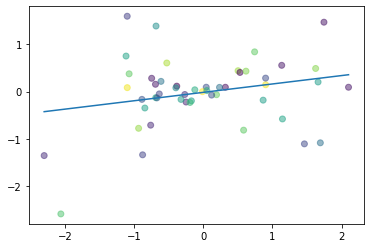

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [15]:
# orig
#x_values = [i for i in range(11)]
#y_values = [2*i + 1 for i in x_values]
# mine
np.random.seed(1)
n = 50
x_values = np.random.randn(n)
x_values.sort()
y_values = 5 * x_values * np.random.randn(n)

In [16]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(50, 1)

In [17]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(50, 1)

In [18]:
import torch
import torch.nn as nn

In [19]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [20]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [21]:
criterion = nn.MSELoss()

In [22]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
epochs = 1000
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 8.387314796447754
epoch 2, loss 8.387314796447754
epoch 3, loss 8.387314796447754
epoch 4, loss 8.387314796447754
epoch 5, loss 8.387314796447754
epoch 6, loss 8.387314796447754
epoch 7, loss 8.387314796447754
epoch 8, loss 8.387314796447754
epoch 9, loss 8.387314796447754
epoch 10, loss 8.387314796447754
epoch 11, loss 8.387314796447754
epoch 12, loss 8.387314796447754
epoch 13, loss 8.387314796447754
epoch 14, loss 8.387314796447754
epoch 15, loss 8.387314796447754
epoch 16, loss 8.387314796447754
epoch 17, loss 8.387314796447754
epoch 18, loss 8.387314796447754
epoch 19, loss 8.387314796447754
epoch 20, loss 8.387314796447754
epoch 21, loss 8.387314796447754
epoch 22, loss 8.387314796447754
epoch 23, loss 8.387314796447754
epoch 24, loss 8.387314796447754
epoch 25, loss 8.387314796447754
epoch 26, loss 8.387314796447754
epoch 27, loss 8.387314796447754
epoch 28, loss 8.387314796447754
epoch 29, loss 8.387314796447754
epoch 30, loss 8.387314796447754
epoch 31, loss 8.38

In [31]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[-1.3529584 ],
       [-1.2268112 ],
       [-0.7341162 ],
       [-0.7253939 ],
       [-0.7250135 ],
       [-0.71094453],
       [-0.6392484 ],
       [-0.6140915 ],
       [-0.6089858 ],
       [-0.5919224 ],
       [-0.54802716],
       [-0.5406858 ],
       [-0.5116844 ],
       [-0.5093391 ],
       [-0.5075389 ],
       [-0.5010164 ],
       [-0.4831181 ],
       [-0.4699288 ],
       [-0.42624998],
       [-0.35757476],
       [-0.35093856],
       [-0.3187288 ],
       [-0.2902335 ],
       [-0.28055674],
       [-0.25049073],
       [-0.24034904],
       [-0.21446198],
       [-0.15686136],
       [-0.12818359],
       [-0.12369261],
       [-0.08745175],
       [-0.05047651],
       [-0.0277446 ],
       [ 0.01647706],
       [ 0.11234528],
       [ 0.12690467],
       [ 0.15431857],
       [ 0.17228866],
       [ 0.23752683],
       [ 0.30199292],
       [ 0.32051715],
       [ 0.3209011 ],
       [ 0.44223076],
       [ 0.44795507],
       [ 0.6138106 ],
       [ 0

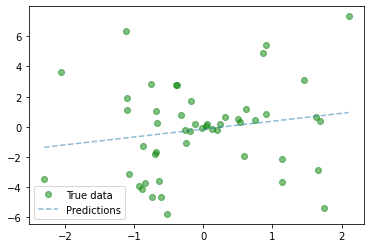

In [32]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()